In [3]:
# Prerequisites
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Peek at the dataset
print(df.shape)
print(df.head())
print(df.describe())


(20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154 

Train shape: (16512, 8)
Test shape: (4128, 8)


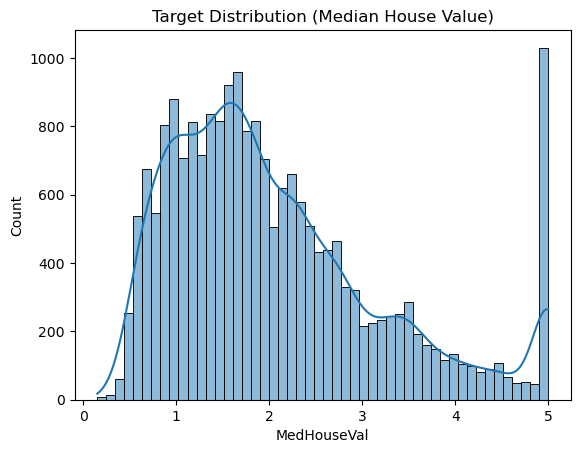

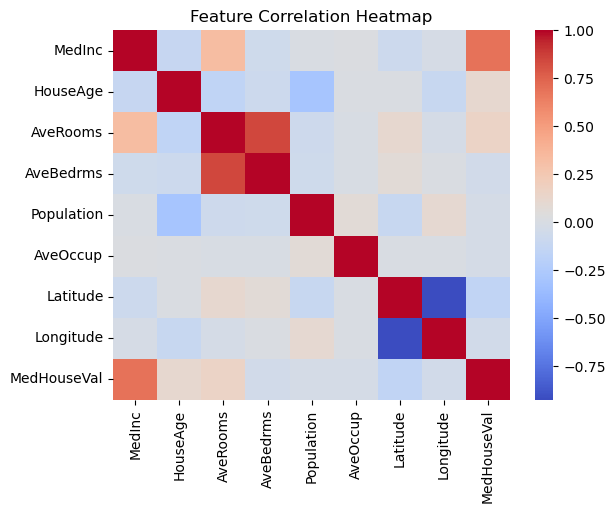

In [5]:
# Train-test split
X = df.drop("MedHouseVal", axis=1)   # features
y = df["MedHouseVal"]                # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Quick EDA
sns.histplot(y, bins=50, kde=True)
plt.title("Target Distribution (Median House Value)")
plt.show()

sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Evaluate
y_pred = lin_reg.predict(X_test_scaled)

print("Baseline Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Baseline Linear Regression Results:
MSE: 0.5558915986952442
MAE: 0.5332001304956565
R²: 0.575787706032451


In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

# Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_scaled, y_train)
elastic_preds = elastic.predict(X_test_scaled)

# Predictions for each model
lin_preds = lin_reg.predict(X_test_scaled)
ridge_preds = ridge.predict(X_test_scaled)
lasso_preds = lasso.predict(X_test_scaled)
elastic_preds = elastic.predict(X_test_scaled)



# Evaluate all
models = {
    "Ridge": ridge_preds,
    "Lasso": lasso_preds,
    "Elastic Net": elastic_preds
}

print(" Regularized Models Performance:")
for name, preds in models.items():
    print(f"{name} → MSE: {mean_squared_error(y_test, preds):.2f} | "
          f"MAE: {mean_absolute_error(y_test, preds):.2f} | "
          f"R²: {r2_score(y_test, preds):.4f}")


 Regularized Models Performance:
Ridge → MSE: 0.56 | MAE: 0.53 | R²: 0.5758
Lasso → MSE: 0.68 | MAE: 0.62 | R²: 0.4814
Elastic Net → MSE: 0.64 | MAE: 0.60 | R²: 0.5148


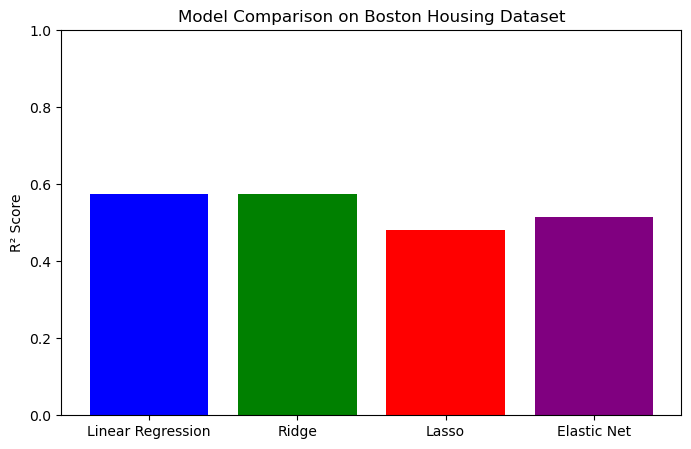

In [31]:
import matplotlib.pyplot as plt

# Collect results
results = {
    "Linear Regression": r2_score(y_test, lin_preds),
    "Ridge": r2_score(y_test, ridge_preds),
    "Lasso": r2_score(y_test, lasso_preds),
    "Elastic Net": r2_score(y_test, elastic_preds)
}

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red", "purple"])
plt.ylabel("R² Score")
plt.title("Model Comparison on Boston Housing Dataset")
plt.ylim(0, 1)
plt.show()
